In [1]:
import kagglehub
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor

C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Esimo įvykių statistikos duomenys : https://data.gov.lt/datasets/509/ ;
# Pritaikyti ML jog nustatytumėte, ar tai buvo susidūrimas su gyvūnu? 
# Ar galite nustatyti kaltininko lytį, pagal pateiktas eismo įvykio aplinkybes?
# Hipotezė - vyrai daro daugiau vienos rūšies klaidų, moterys - kitos.

In [3]:
df = pd.read_json(r'C:\Users\pauli\Downloads\ei_2023_12_31(1).json')

In [4]:
df.head()

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."
1,07-23-9588946,2023-01-01 00:10,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,None,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ..."
2,07-23-9588947,2023-01-01 00:38,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,None,1,20.0,Ne,Ne,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ..."
3,07-23-9588948,2023-01-01 00:35,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,None,1,110.0,Ne,Ne,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ..."
4,07-23-9588949,2022-12-31 23:53,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,None,1,20.0,Ne,Ne,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ..."


In [36]:
df1=df

In [37]:
lytis=[]
for i in df1['eismoDalyviai']:
    try:
        lytis.append(i[0]['lytis'])
    except:
        lytis.append(None)
df1['lytis'] = lytis
df1 = df1.dropna(subset='lytis')

In [7]:
# antras lyties dublis

# lytis=[]
# mt=[]
# for i in df1['eismoDalyviai']:
#     try:
#         lyt=None
#         for j in i:
#             mt.append(j['kaltininkas'])
#             if j['kaltininkas'] == 'Taip':
#                 lyt=(j['lytis'])
#         lytis.append(lyt)
#     except:
#         lytis.append(None)
# df1['lytis'] = lytis
# df1 = df1.dropna(subset='lytis')

In [38]:
len(lytis)

24240

In [39]:
df1=df1[['rusis', 'dataLaikas', 'dalyviuSkaicius', 'zuvusiuSkaicius', 'suzeistuSkaicius',
         'tpSkaicius', 'dangosRusis', 'meteoSalygos', 'kelioGatvesKreive',
         'leistinasGreitis', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'ilguma', 'platuma', 'lytis' ]]

df1=df1.dropna()

In [40]:
menuo = []
valanda=[]

for i in df1['dataLaikas']:
    val = i.split(' ')[-1].split(':')[0]
    men = i.split('-')[1]
    valanda.append(val)
    menuo.append(men)
    
df1['menuo'] = menuo
df1['valanda'] = valanda
df1['menuo'] = df1['menuo'].astype(int)
df1['valanda'] = df1['valanda'].astype(int)

In [41]:
df1['rusis1'] = df1['rusis'].apply(lambda x: 1 if str(x) == 'Užvažiavimas ant gyvūno' else 0)

In [42]:
# df1['rusis1'] = LabelEncoder().fit_transform(df1['rusis'])
# rusis_kodas = dict(zip(df1['rusis'], df1['rusis1']))

df1['dangosRusis1'] = LabelEncoder().fit_transform(df1['dangosRusis'])
dangosRusis_kodas = dict(zip(df1['dangosRusis'], df1['dangosRusis1']))

df1['meteoSalygos1'] = LabelEncoder().fit_transform(df1['meteoSalygos'])
meteoSalygos_kodas = dict(zip(df1['meteoSalygos'], df1['meteoSalygos1']))

df1['kelioGatvesKreive1'] = LabelEncoder().fit_transform(df1['kelioGatvesKreive'])
kelioGatvesKreive_kodas = dict(zip(df1['kelioGatvesKreive'], df1['kelioGatvesKreive1']))

df1['neblaivusKaltininkai1'] = LabelEncoder().fit_transform(df1['neblaivusKaltininkai'])
neblaivusKaltininkai_kodas = dict(zip(df1['neblaivusKaltininkai'], df1['neblaivusKaltininkai1']))

df1['apsvaigeKaltininkai1'] = LabelEncoder().fit_transform(df1['apsvaigeKaltininkai'])
apsvaigeKaltininkai_kodas = dict(zip(df1['apsvaigeKaltininkai'], df1['apsvaigeKaltininkai1']))

df1['lytis1'] = LabelEncoder().fit_transform(df1['lytis'])
lytis_kodas = dict(zip(df1['lytis'], df1['lytis1']))


In [13]:
lytis_kodas

{'Vyras': 1, 'Moteris': 0}

In [43]:
X= df1.drop(columns=['rusis', 'dataLaikas', 'dangosRusis', 'meteoSalygos', 'kelioGatvesKreive', 'neblaivusKaltininkai',
                     'apsvaigeKaltininkai', 'lytis', 'rusis1' ])

y=df1['rusis1']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 84.14517669531996


C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20937 entries, 0 to 24239
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rusis                  20937 non-null  object 
 1   dataLaikas             20937 non-null  object 
 2   dalyviuSkaicius        20937 non-null  int64  
 3   zuvusiuSkaicius        20937 non-null  int64  
 4   suzeistuSkaicius       20937 non-null  int64  
 5   tpSkaicius             20937 non-null  int64  
 6   dangosRusis            20937 non-null  object 
 7   meteoSalygos           20937 non-null  object 
 8   kelioGatvesKreive      20937 non-null  object 
 9   leistinasGreitis       20937 non-null  float64
 10  neblaivusKaltininkai   20937 non-null  object 
 11  apsvaigeKaltininkai    20937 non-null  object 
 12  ilguma                 20937 non-null  float64
 13  platuma                20937 non-null  float64
 14  lytis                  20937 non-null  object 
 15  menuo  

In [17]:
df1['rusis2'] = LabelEncoder().fit_transform(df1['rusis'])
rusis_kodas = dict(zip(df1['rusis'], df1['rusis2']))

In [18]:
X= df1.drop(columns=['rusis', 'dataLaikas', 'dangosRusis', 'meteoSalygos', 'kelioGatvesKreive', 'neblaivusKaltininkai',
                     'apsvaigeKaltininkai', 'lytis', 'lytis1', 'rusis1' ])

y=df1['lytis1']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 71.23527539000318


C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
df2=df1.groupby(['rusis', 'lytis'])['menuo'].count().reset_index()

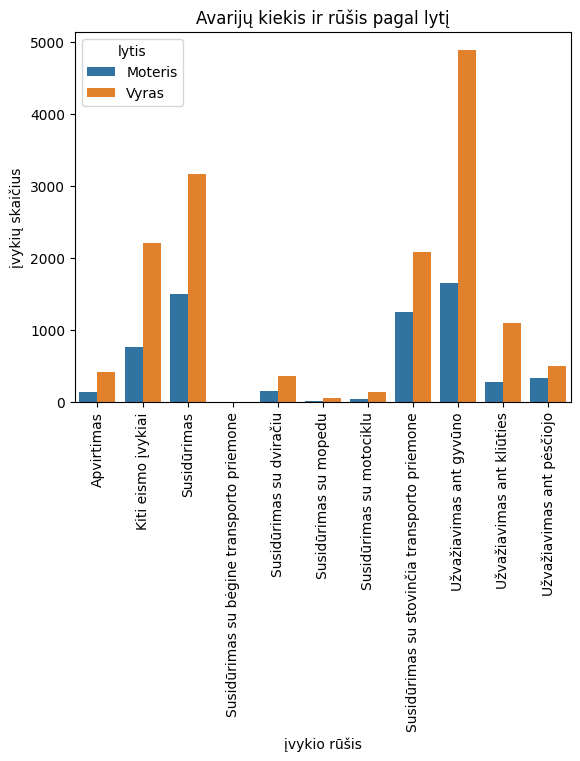

In [21]:
sns.barplot(data=df2, x= 'rusis', y='menuo', hue = 'lytis')
plt.title('Avarijų kiekis ir rūšis pagal lytį')
plt.ylabel('įvykių skaičius')
plt.xlabel('įvykio rūšis')
plt.xticks(rotation=90)
plt.show()

In [22]:
df3=df2.groupby('lytis')['menuo'].sum()
moterys= df3.values[0]
vyrai = df3.values[1]

In [23]:
df2['proc'] = df2.apply(lambda row: (row['menuo'] / moterys)*100 if row['lytis'] == "Moteris" 
                        else (row['menuo'] / vyrai)*100, axis=1)

In [24]:
df2.head(30)

,rusis,lytis,menuo,proc
0,Apvirtimas,Moteris,127,2.091568
1,Apvirtimas,Vyras,413,2.778338
2,Kiti eismo įvykiai,Moteris,758,12.483531
3,Kiti eismo įvykiai,Vyras,2197,14.779684
4,Susidūrimas,Moteris,1498,24.670619
5,Susidūrimas,Vyras,3168,21.311806
6,Susidūrimas su bėgine transporto priemone,Vyras,1,0.006727
7,Susidūrimas su dviračiu,Moteris,143,2.355072
8,Susidūrimas su dviračiu,Vyras,361,2.428523
9,Susidūrimas su mopedu,Moteris,10,0.164690


In [25]:
# Antra - logistinės regresijos ir sprendimų medžio (classsifier) palyginimas -
# paimkite savo ankstesnį kodą, skirtą nustatyti, ar eismo įvykis buv su gyvūnu, 
# ar ne, atliktą su logistine regresija. Pritaikykite DecisionTreeClassifier().
# paskaičiuokite accuracy_score abiems atvejams. Vizualizuokite comfusiom matrix 
# abiems atvejams. Patestuokite su keliais konkrečiais atvejais. Kuris modelis spėdavo geriau?

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [45]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("lala", accuracy*100)

lala 89.19134033747214
